In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

<h2>2a</h2>
For the purposes of this assignment, I think treating 'missing' as its own category is reasonable since almost every independent variable contains missing values, and since the missing values appear in relatively high frequencies across the independent variables. If we were to remove the data points (i.e. rows in the train/test dataframes) that contained missing values, we would likely remove a very large chunk of our data, which may affect how well our model is trained and how well it can predict the dependent variable. Also, we don't know if the missing values are uniform across a given row in the train and test dataframe (i.e. for a given row, there may be some missing values for some variables and known values for others), so it would not be reasonable to filter the missing information out. Instead, treating it as its own category can ensure that we use all of our datapoints, and can contextualize our results based on what we were given.

<h2>2b i</h2>

In [42]:
train = pd.read_csv('yelp142_train.csv')
test = pd.read_csv('yelp142_test.csv')

In [43]:
#dummy encoding our categorical variables
train_enc = pd.get_dummies(train, columns = ['GoodForKids', 'Alcohol', 'BusinessAcceptsCreditCards', 'WiFi', 'BikeParking', 'ByAppointmentOnly', 'WheelechairAccessible', 'OutdoorSeating', 'RestaurantsReservations', 'DogsAllowed', 'Caters'])
train_enc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6272 entries, 0 to 6271
Data columns (total 37 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   stars                                 6272 non-null   float64
 1   review_count                          6272 non-null   int64  
 2   GoodForKids_(Missing)                 6272 non-null   uint8  
 3   GoodForKids_FALSE                     6272 non-null   uint8  
 4   GoodForKids_TRUE                      6272 non-null   uint8  
 5   Alcohol_'beer_and_wine'               6272 non-null   uint8  
 6   Alcohol_'full_bar'                    6272 non-null   uint8  
 7   Alcohol_'none'                        6272 non-null   uint8  
 8   Alcohol_(Missing)                     6272 non-null   uint8  
 9   BusinessAcceptsCreditCards_(Missing)  6272 non-null   uint8  
 10  BusinessAcceptsCreditCards_FALSE      6272 non-null   uint8  
 11  BusinessAcceptsCr

In [44]:
test_enc = pd.get_dummies(test, columns = ['GoodForKids', 'Alcohol', 'BusinessAcceptsCreditCards', 'WiFi', 'BikeParking', 'ByAppointmentOnly', 'WheelechairAccessible', 'OutdoorSeating', 'RestaurantsReservations', 'DogsAllowed', 'Caters'])

In [45]:
#Choosing variables to be used

X_train_linear = train_enc.drop(['stars'], axis=1)

#variable we are predicting
y_train_linear = train_enc['stars']

#adding an intercept
X_train_linear = sm.add_constant(X_train_linear)

#fit data to model

ols = smf.ols(formula = "stars ~ review_count + C(GoodForKids, Treatment(reference=\'(Missing)\')) + C(Alcohol, Treatment(reference=\'(Missing)\')) + C(BusinessAcceptsCreditCards, Treatment(reference=\'(Missing)\')) + C(WiFi, Treatment(reference=\'(Missing)\')) + C(BikeParking, Treatment(reference=\'(Missing)\')) + C(ByAppointmentOnly, Treatment(reference=\'(Missing)\')) + C(WheelechairAccessible, Treatment(reference=\'(Missing)\')) + C(OutdoorSeating, Treatment(reference=\'(Missing)\')) +C(RestaurantsReservations, Treatment(reference=\'(Missing)\')) + C(DogsAllowed, Treatment(reference=\'(Missing)\')) + C(Caters, Treatment(reference=\'(Missing)\'))", data = train)
model1 = ols.fit()
print(model1.summary())


/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


                            OLS Regression Results                            
Dep. Variable:                  stars   R-squared:                       0.175
Model:                            OLS   Adj. R-squared:                  0.171
Method:                 Least Squares   F-statistic:                     52.86
Date:                Mon, 18 Oct 2021   Prob (F-statistic):          1.16e-237
Time:                        15:04:26   Log-Likelihood:                -7281.7
No. Observations:                6272   AIC:                         1.462e+04
Df Residuals:                    6246   BIC:                         1.479e+04
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                                                                               coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------

<h2>2b ii</h2>

In [47]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer          


grid_values = {'ccp_alpha': np.linspace(0, 0.10, 201),
               'min_samples_leaf': [5],
               'min_samples_split': [20],
               'max_depth': [30],
               'random_state': [88]}

dtr = DecisionTreeRegressor()


dtr_cv_mse = GridSearchCV(dtr, param_grid = grid_values, cv=10, verbose=1,
                              scoring = 'neg_mean_squared_error')
dtr_cv_mse.fit(X_train_linear, y_train_linear)

Fitting 10 folds for each of 201 candidates, totalling 2010 fits


GridSearchCV(cv=10, estimator=DecisionTreeRegressor(),
             param_grid={'ccp_alpha': array([0.    , 0.0005, 0.001 , 0.0015, 0.002 , 0.0025, 0.003 , 0.0035,
       0.004 , 0.0045, 0.005 , 0.0055, 0.006 , 0.0065, 0.007 , 0.0075,
       0.008 , 0.0085, 0.009 , 0.0095, 0.01  , 0.0105, 0.011 , 0.0115,
       0.012 , 0.0125, 0.013 , 0.0135, 0.014 , 0.0145, 0.015 , 0.0155,
       0.016 , 0.0165, 0.017 , 0.0175, 0.018 , 0.0185, 0.019 , 0.0195,
       0.02  , 0.020...
       0.08  , 0.0805, 0.081 , 0.0815, 0.082 , 0.0825, 0.083 , 0.0835,
       0.084 , 0.0845, 0.085 , 0.0855, 0.086 , 0.0865, 0.087 , 0.0875,
       0.088 , 0.0885, 0.089 , 0.0895, 0.09  , 0.0905, 0.091 , 0.0915,
       0.092 , 0.0925, 0.093 , 0.0935, 0.094 , 0.0945, 0.095 , 0.0955,
       0.096 , 0.0965, 0.097 , 0.0975, 0.098 , 0.0985, 0.099 , 0.0995,
       0.1   ]),
                         'max_depth': [30], 'min_samples_leaf': [5],
                         'min_samples_split': [20], 'random_state': [88]},
            

In [48]:
mse = dtr_cv_mse.cv_results_['mean_test_score']
ccp_mse = dtr_cv_mse.cv_results_['param_ccp_alpha'].data
pd.DataFrame({'ccp alpha' : ccp_mse, 'Validation MSE': mse}).head(20)

,ccp alpha,Validation MSE
0,0.0,-0.665134
1,0.0005,-0.601527
2,0.001,-0.592236
3,0.0015,-0.597377
4,0.002,-0.603779
5,0.0025,-0.610052
6,0.003,-0.609416
7,0.0035,-0.607778
8,0.004,-0.608944
9,0.0045,-0.613722


In [49]:
print('Grid best parameter ccp_alpha (max mse): ', dtr_cv_mse.best_params_['ccp_alpha'])
print('Grid best score (mse): ', dtr_cv_mse.best_score_)

Grid best parameter ccp_alpha (max mse):  0.001
Grid best score (mse):  -0.5922364520896857


Our cross-validation analysis implemented GridSearch and used a negated mean square error (MSE) as a scoring metric to evaluate which complexity parameter would be optimal for our model. The complexity parameter with the maximum negative MSE (i.e. the lowest positive MSE) is 0.001, so we will use this to build our classification tree.

In [50]:
dtr = DecisionTreeRegressor(min_samples_split=10, 
                            ccp_alpha= 0.001,
                            random_state = 88)
dtr = dtr.fit(X_train_linear, y_train_linear)

Node count = 65


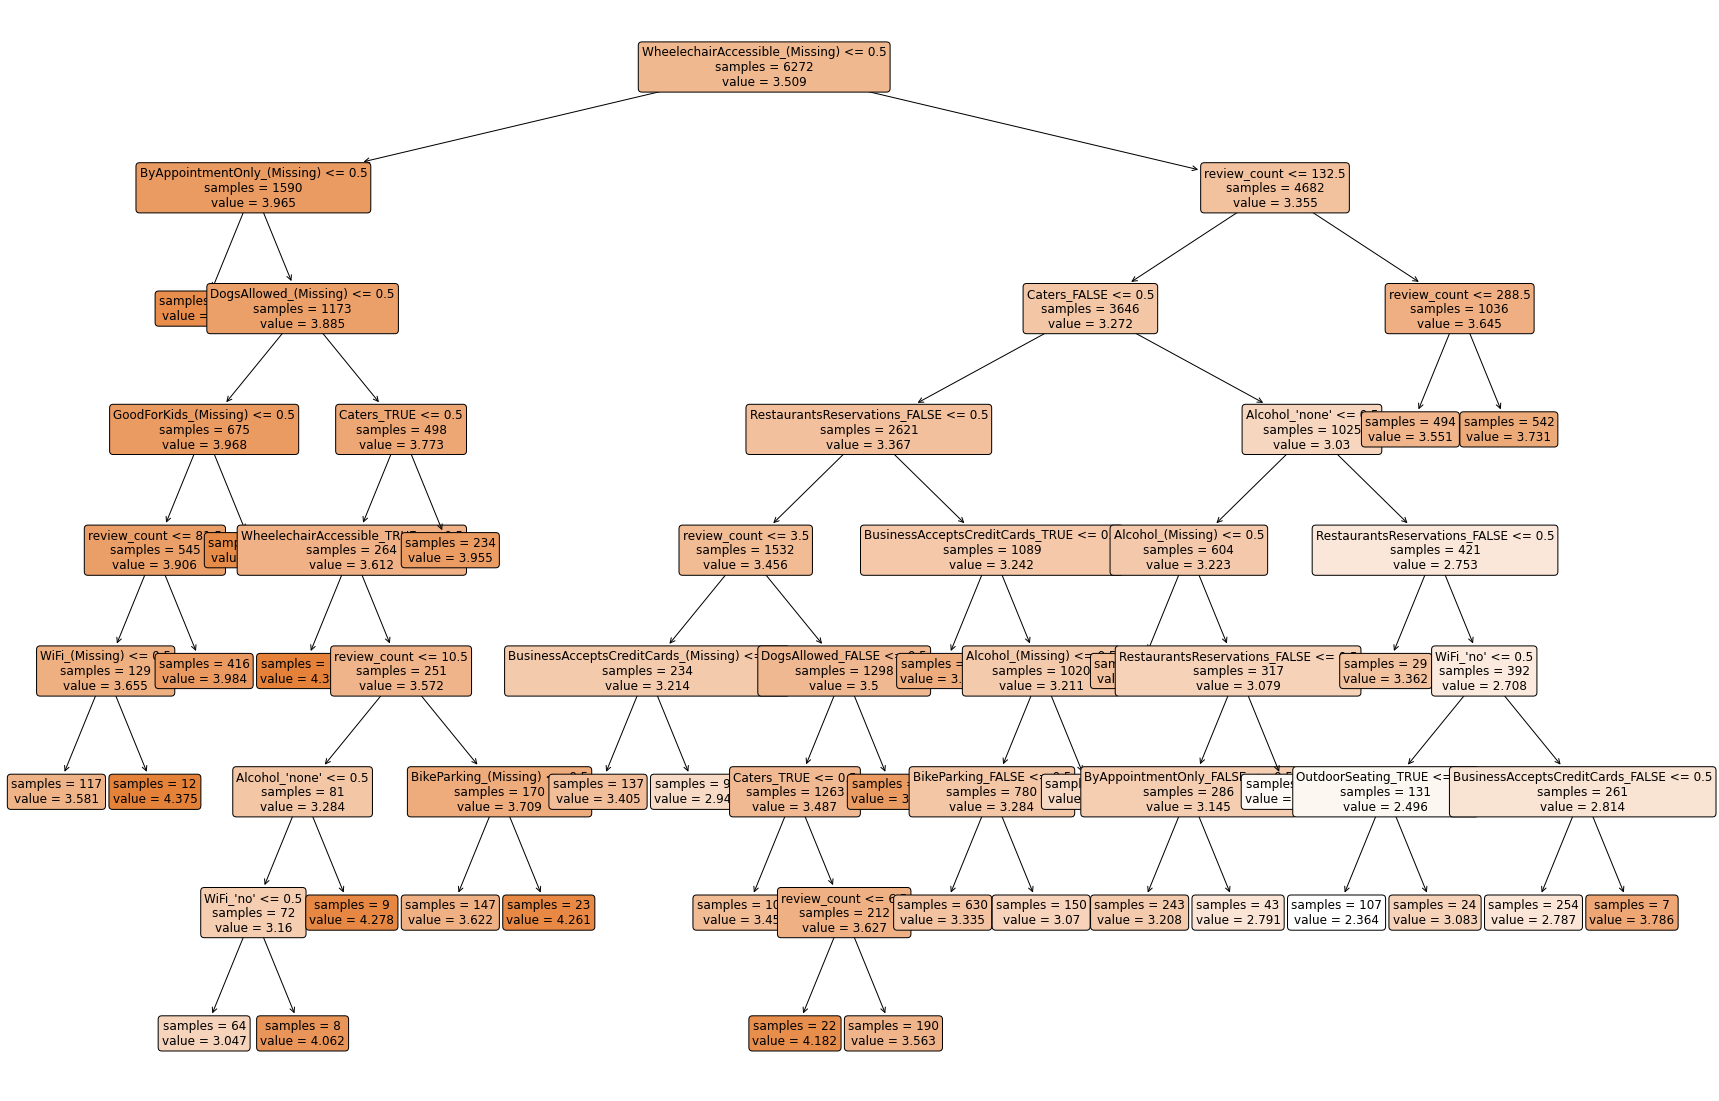

In [51]:
print('Node count =', dtr.tree_.node_count)
plt.figure(figsize=(30,20))
plot_tree(dtr, 
          feature_names=X_train_linear.columns, 
          class_names=['0','1'], 
          filled=True,
          impurity=False,
          rounded=True,
          fontsize=12)
plt.show()

<h2>2b iii</h2>

In [52]:
def OSR2(model, X_test, y_test, y_train):
    
    y_pred = model.predict(X_test)
    SSE = np.sum((y_test - y_pred)**2)
    SST = np.sum((y_test - np.mean(y_train))**2)
                 
    return (1 - SSE/SST)


In [54]:
from sklearn.metrics import mean_absolute_error
y_test = test['stars']
X_test = test.drop(['stars'], axis=1)
y_train = train['stars']

X_test_2 = test_enc


osr2_lin_reg_model = OSR2(model1, X_test, y_test, y_train)
osr2_reg_tree_model =  OSR2(dtr, X_test_2, y_test, y_train)
mae_lin_reg_model = mean_absolute_error(y_test, model1.predict(X_test))
mae_reg_tree_model = mean_absolute_error(y_test, dtr.predict(X_test_2))
print('OSR^2 for Linear Regression Model %.4f' % osr2_lin_reg_model)
print('OSR^2 for Regression Tree %.4f' % osr2_reg_tree_model)
print('MAE for Linear Regression Model %.4f' % mae_lin_reg_model)
print('MAE for Regression Tree %.4f' % mae_reg_tree_model)


OSR^2 for Linear Regression Model 0.1458
OSR^2 for Regression Tree 0.1530
MAE for Linear Regression Model 0.6295
MAE for Regression Tree 0.6166


First, a lower MAE corresponds to a more accurate model; in this case, our regression tree has a lower MAE. A higher OSR^2 indicates that our model fits our data better. In this case, our regression tree has a higher OSR^2 value. Thus, our regression tree seems to be better fit for our data that the linear regression model based on these metrics.

<h2>2c</h2>

In [16]:
new_train = train.copy(deep=True)
new_test = test.copy(deep=True)
new_train['fourOrAbove'] = [1 if x >= 4 else 0 for x in new_train['stars']]
new_test['fourOrAbove'] = [1 if x >= 4 else 0 for x in new_test['stars']]

In [17]:
new_train = new_train.drop(['stars'], axis=1)
new_test = new_test.drop(['stars'], axis=1)

<h2>2d i</h2>
The prompt implies that we will be choosing accuracy over precision and recall to evaluate our model. This modeling choice can be considered reasonable if our dataset is relatively balanced between values of 0 and 1. If so, accuracy will allow us to evaluate how our model correctly classified reviews with four or above stars and those with less than four stars. This is appropriate for our purposes because we want to see whether our classifier is accurate/correct in classifying restaurants with four or above stars and compare this accuracy with the accuracy of other types of models. Since we want to guage how well our model predicts the dependent variable, using accuracy is reasonable. 

<h2>2d ii</h2>


In [55]:
#y_pred_model1 
model1_df = model1.predict(X_test).to_frame()
model1_df[0] = [1 if x >= 4 else 0 for x in model1_df[0]]
model1_df[0]

0       0
1       0
2       0
3       0
4       0
       ..
2683    0
2684    0
2685    0
2686    0
2687    0
Name: 0, Length: 2688, dtype: int64

In [56]:
from sklearn.metrics import confusion_matrix
y_test_binary = [1 if x >= 4 else 0 for x in y_test]
cm_lin_reg = confusion_matrix(y_test_binary, model1_df[0].array)

print ("Confusion Matrix : \n", cm_lin_reg)

acc_lin_reg = (cm_lin_reg.ravel()[0]+cm_lin_reg.ravel()[3])/sum(cm_lin_reg.ravel())
TPR_lin_reg = cm_lin_reg.ravel()[3]/(cm_lin_reg.ravel()[3]+cm_lin_reg.ravel()[2])
FPR_lin_reg = cm_lin_reg.ravel()[1]/(cm_lin_reg.ravel()[1]+cm_lin_reg.ravel()[0])
print('Accuracy is: %.4f' %acc_lin_reg)
print('TPR is: %.4f' % TPR_lin_reg)
print('FPR is: %.4f' % FPR_lin_reg)

Confusion Matrix : 
 [[1419   76]
 [ 942  251]]
Accuracy is: 0.6213
TPR is: 0.2104
FPR is: 0.0508


In [59]:
dtr_df = dtr.predict(X_test_2)
dtr_df = pd.Series(dtr_df).to_frame()
dtr_df[0] = [1 if x >= 4 else 0 for x in dtr_df[0]]
dtr_df[0]

0       0
1       0
2       0
3       0
4       0
       ..
2683    0
2684    0
2685    0
2686    1
2687    0
Name: 0, Length: 2688, dtype: int64

In [60]:
from sklearn.metrics import confusion_matrix
y_test_binary = [1 if x >= 4 else 0 for x in y_test]
cm_dtr = confusion_matrix(y_test_binary, dtr_df[0].array)

print ("Confusion Matrix : \n", cm_dtr)

acc_dtr = (cm_dtr.ravel()[0]+cm_dtr.ravel()[3])/sum(cm_dtr.ravel())
TPR_dtr = cm_dtr.ravel()[3]/(cm_dtr.ravel()[3]+cm_dtr.ravel()[2])
FPR_dtr = cm_dtr.ravel()[1]/(cm_dtr.ravel()[1]+cm_dtr.ravel()[0])
print('Accuracy is: %.4f' %acc_dtr)
print('TPR is: %.4f' % TPR_dtr)
print('FPR is: %.4f' % FPR_dtr)

Confusion Matrix : 
 [[1441   54]
 [ 999  194]]
Accuracy is: 0.6083
TPR is: 0.1626
FPR is: 0.0361


<h2>2d iii</h2>

In [61]:
logreg = smf.logit(formula = "fourOrAbove ~ review_count + C(GoodForKids, Treatment(reference=\'(Missing)\')) + C(Alcohol, Treatment(reference=\'(Missing)\')) + C(BusinessAcceptsCreditCards, Treatment(reference=\'(Missing)\')) + C(WiFi, Treatment(reference=\'(Missing)\')) + C(BikeParking, Treatment(reference=\'(Missing)\')) + C(ByAppointmentOnly, Treatment(reference=\'(Missing)\')) + C(WheelechairAccessible, Treatment(reference=\'(Missing)\')) + C(OutdoorSeating, Treatment(reference=\'(Missing)\')) +C(RestaurantsReservations, Treatment(reference=\'(Missing)\')) + C(DogsAllowed, Treatment(reference=\'(Missing)\')) + C(Caters, Treatment(reference=\'(Missing)\'))", 
                   data = new_train).fit()

print(logreg.summary())

Optimization terminated successfully.
         Current function value: 0.603049
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:            fourOrAbove   No. Observations:                 6272
Model:                          Logit   Df Residuals:                     6246
Method:                           MLE   Df Model:                           25
Date:                Mon, 18 Oct 2021   Pseudo R-squ.:                  0.1209
Time:                        15:27:08   Log-Likelihood:                -3782.3
converged:                       True   LL-Null:                       -4302.5
Covariance Type:            nonrobust   LLR p-value:                1.634e-203
                                                                               coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------

In [62]:
y_test_log_reg = new_test['fourOrAbove']

In [63]:
y_prob = logreg.predict(new_test)
y_prob

0       0.196241
1       0.269196
2       0.714983
3       0.272357
4       0.597452
          ...   
2683    0.503171
2684    0.523266
2685    0.253729
2686    0.656297
2687    0.249789
Length: 2688, dtype: float64

In [64]:
y_pred_log_reg = pd.Series([1 if x > 0.5 else 0 for x in y_prob], index=y_prob.index)

In [65]:
from sklearn.metrics import confusion_matrix
cm_log_reg = confusion_matrix(y_test_log_reg, y_pred_log_reg)
print ("Confusion Matrix : \n", cm_log_reg) 

Confusion Matrix : 
 [[1177  318]
 [ 610  583]]


In [66]:
# Accuracy
acc_log_reg = (cm_log_reg.ravel()[0]+cm_log_reg.ravel()[3])/sum(cm_log_reg.ravel())  # T/total = (TP+TN)/total
TPR_log_reg = cm_log_reg.ravel()[3]/(cm_log_reg.ravel()[3]+cm_log_reg.ravel()[2])
FPR_log_reg = cm_log_reg.ravel()[1]/(cm_log_reg.ravel()[1]+cm_log_reg.ravel()[0])
print('Accuracy is: %.4f' %acc_log_reg)
print('TPR is: %.4f' % TPR_log_reg)
print('FPR is: %.4f' % FPR_log_reg)

Accuracy is: 0.6548
TPR is: 0.4887
FPR is: 0.2127


<h2>2d iv</h2>

In [67]:
new_train_enc = pd.get_dummies(new_train, columns = ['GoodForKids', 'Alcohol', 'BusinessAcceptsCreditCards', 'WiFi', 'BikeParking', 'ByAppointmentOnly', 'WheelechairAccessible', 'OutdoorSeating', 'RestaurantsReservations', 'DogsAllowed', 'Caters'])
new_test_enc = pd.get_dummies(new_test, columns = ['GoodForKids', 'Alcohol', 'BusinessAcceptsCreditCards', 'WiFi', 'BikeParking', 'ByAppointmentOnly', 'WheelechairAccessible', 'OutdoorSeating', 'RestaurantsReservations', 'DogsAllowed', 'Caters'])
X_train_class = new_train_enc.drop(['fourOrAbove'], axis=1)

#variable we are predicting
y_train_class = new_train_enc['fourOrAbove']

In [68]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

grid_values_2 = {'ccp_alpha': np.linspace(0, 0.10, 201),
               'min_samples_leaf': [5],
               'min_samples_split': [20],
               'max_depth': [30],
               'class_weight' : ['balanced'],
               'random_state': [88]}



dtc = DecisionTreeClassifier()

dtc_cv_acc = GridSearchCV(dtc, param_grid = grid_values_2, scoring = 'accuracy', cv=10, verbose=1) 

dtc_cv_acc.fit(X_train_class, y_train_class)


Fitting 10 folds for each of 201 candidates, totalling 2010 fits


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'ccp_alpha': array([0.    , 0.0005, 0.001 , 0.0015, 0.002 , 0.0025, 0.003 , 0.0035,
       0.004 , 0.0045, 0.005 , 0.0055, 0.006 , 0.0065, 0.007 , 0.0075,
       0.008 , 0.0085, 0.009 , 0.0095, 0.01  , 0.0105, 0.011 , 0.0115,
       0.012 , 0.0125, 0.013 , 0.0135, 0.014 , 0.0145, 0.015 , 0.0155,
       0.016 , 0.0165, 0.017 , 0.0175, 0.018 , 0.0185, 0.019 , 0.0195,
       0.02  , 0.02...
       0.084 , 0.0845, 0.085 , 0.0855, 0.086 , 0.0865, 0.087 , 0.0875,
       0.088 , 0.0885, 0.089 , 0.0895, 0.09  , 0.0905, 0.091 , 0.0915,
       0.092 , 0.0925, 0.093 , 0.0935, 0.094 , 0.0945, 0.095 , 0.0955,
       0.096 , 0.0965, 0.097 , 0.0975, 0.098 , 0.0985, 0.099 , 0.0995,
       0.1   ]),
                         'class_weight': ['balanced'], 'max_depth': [30],
                         'min_samples_leaf': [5], 'min_samples_split': [20],
                         'random_state': [88]},
             scoring='accura

In [69]:
acc_dtc = dtc_cv_acc.cv_results_['mean_test_score'] 
ccp_dtc = dtc_cv_acc.cv_results_['param_ccp_alpha'].data

pd.DataFrame({'ccp alpha' : ccp_dtc, 'Validation Accuracy': acc_dtc}).head(20)

,ccp alpha,Validation Accuracy
0,0.0,0.630425
1,0.0005,0.658639
2,0.001,0.663263
3,0.0015,0.659280
4,0.002,0.660237
5,0.0025,0.660237
6,0.003,0.660237
7,0.0035,0.660237
8,0.004,0.660237
9,0.0045,0.660237


In [70]:
print('Grid best parameter ccp_alpha (max. accuracy): ', dtc_cv_acc.best_params_['ccp_alpha'])
print('Grid best score (accuracy): ', dtc_cv_acc.best_score_)

Grid best parameter ccp_alpha (max. accuracy):  0.001
Grid best score (accuracy):  0.6632632899562165


Our cross-validation analysis implemented GridSearch and used accuracy as a scoring metric to evaluate which complexity parameter would be optimal for our model. The complexity parameter with the maximum accuracy is 0.001, so we will use this to build our classification tree. 

Node count = 23


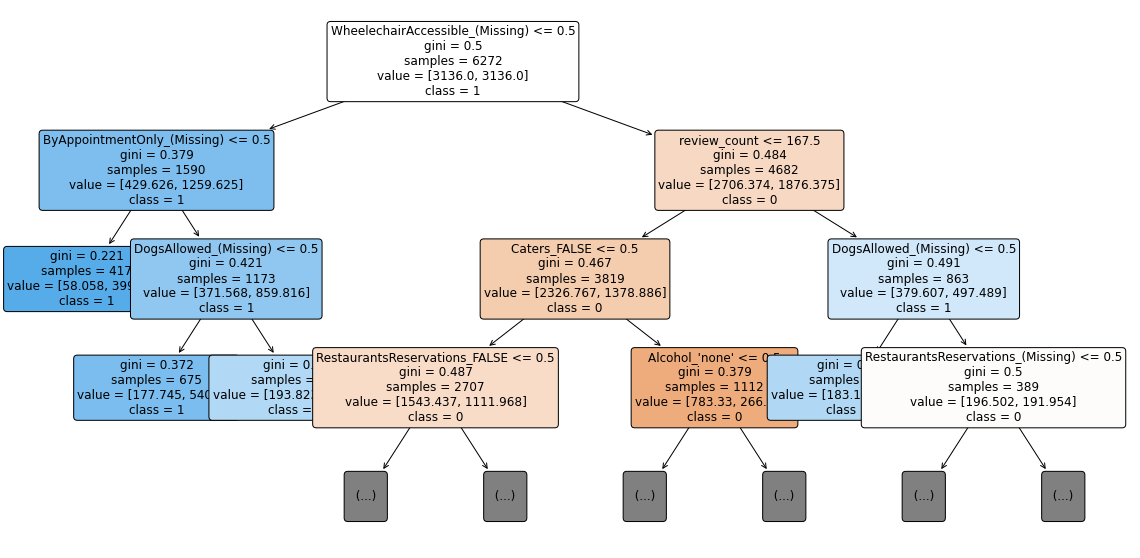

In [71]:
print('Node count =', dtc_cv_acc.best_estimator_.tree_.node_count)

plt.figure(figsize=(20,10))
plot_tree(dtc_cv_acc.best_estimator_, 
          feature_names=X_train_class.columns, 
          class_names=['0','1'],
          filled=True,
          impurity=True,
          rounded=True,
          fontsize=12,
          max_depth=3)
plt.show()

<h2>2d v</h2>

In [72]:
from sklearn.metrics import confusion_matrix
X_test_dtc = new_test_enc.drop(['fourOrAbove'], axis=1)
y_pred_dtc = dtc_cv_acc.best_estimator_.predict(X_test_dtc)
y_test_dtc = new_test_enc['fourOrAbove']

cm_dtc = confusion_matrix(y_test_dtc, y_pred_dtc)

print ("Confusion Matrix : \n", cm_dtc)

acc_dtc = (cm_dtc.ravel()[0]+cm_dtc.ravel()[3])/sum(cm_dtc.ravel())
TPR_dtc = cm_dtc.ravel()[3]/(cm_dtc.ravel()[3]+cm_dtc.ravel()[2])
FPR_dtc = cm_dtc.ravel()[1]/(cm_dtc.ravel()[1]+cm_dtc.ravel()[0])
print('Accuracy is: %.4f' %acc_dtc)
print('TPR is: %.4f' % TPR_dtc)
print('FPR is: %.4f' % FPR_dtc)

Confusion Matrix : 
 [[1151  344]
 [ 605  588]]
Accuracy is: 0.6469
TPR is: 0.4929
FPR is: 0.2301


In [73]:
y_pred_baseline = pd.Series([0 for x in y_prob], index=y_prob.index)

In [74]:
cm_baseline = confusion_matrix(y_test_dtc, y_pred_baseline)
print ("Confusion Matrix : \n", cm_baseline) 

Confusion Matrix : 
 [[1495    0]
 [1193    0]]


In [75]:
# Baseline Accuracy
acc_baseline = (cm_baseline.ravel()[0]+cm_baseline.ravel()[3])/sum(cm_baseline.ravel())  # T/total = (TP+TN)/total
TPR_baseline = cm_baseline.ravel()[3]/(cm_baseline.ravel()[3]+cm_baseline.ravel()[2])
FPR_baseline = cm_baseline.ravel()[1]/(cm_baseline.ravel()[1]+cm_baseline.ravel()[0])
print('Accuracy is: %.4f' %acc_baseline)
print('TPR is: %.4f' % TPR_baseline)
print('FPR is: %.4f' % FPR_baseline)

Accuracy is: 0.5562
TPR is: 0.0000
FPR is: 0.0000


In [76]:
pd.DataFrame(np.array([['Linear Regression', acc_lin_reg, TPR_lin_reg, FPR_lin_reg], 
                       ['Decision Tree Regression', acc_dtr, TPR_dtr, FPR_dtr], 
                       ['Logistic Regression', acc_log_reg, TPR_log_reg, FPR_log_reg], 
                       ['Decision Tree Classifier', acc_dtc, TPR_dtc, FPR_dtc], 
                       ['Baseline', acc_baseline, TPR_baseline, FPR_baseline]]),
                   columns=['Model', 'Accuracy', 'TPR', 'FPR'])

,Model,Accuracy,TPR,FPR
0,Linear Regression,0.6212797619047619,0.21039396479463537,0.050836120401337795
1,Decision Tree Regression,0.6082589285714286,0.16261525565800503,0.036120401337792644
2,Logistic Regression,0.6547619047619048,0.4886839899413244,0.21270903010033446
3,Decision Tree Classifier,0.6469494047619048,0.4928751047778709,0.23010033444816053
4,Baseline,0.5561755952380952,0.0,0.0


From our table, we can make a number of observations. First, all of our models have higher accuracies than the baseline model, which is good because this indicates that our other models were relatively capable of predicting the correct result given the variables we used. We can see that the logsitic regression and decision tree classifier models have the highest accuracy; therefore, our classification models did a better job than our regression models. This result seems reasonable to me because given our dataset, which comprised of mostly categorical variables, it makes sense that a classifier would do a better job at predicting a binary output than a regression model would be at predicting a star rating from 1 to 5. Therefore, I would recommend one of the classification models (logistic regression or decision tree classifier) for this problem given their higher accuracy scores and the types of variables in our dataset as is. 

<h2>2e</h2>

We can figure out which variables are the most important in deciding the star rating by looking at our decision trees and assessing our logistic regression model.

First, it should be noted that in a decision tree, the most important variable is at the top of the tree, and the tree is subsequently constructed by order of variables from most important to least important. From our decision trees, we can see that 'WheelchairAccessible' is at the very top of the tree, which means this variable splits our data up into the largest chunks and there is a lot of variability in this feature. Thus, my first tip is that restaurants should consider being wheelchair accessible to achieve a higher rating. 

From there, we can work our way down the tree to see which other variables are the most important. The next two variables after 'WheelchairAccessible' are 'ByAppointmentOnly' and 'reviewCounts'. This means that restaurant ratings are dependent on how many reviews there are and whether the restaurant allows seating with or without appointment. To get higher star ratings, my second tip would be for resaurant owners to encourage reviews and feedback from customers and regularly guage how they can improve based on those reviews. My third tip would be for restaurants to be clear about whether they seat by appointment only. Intuitively, it would be more accessible to customers if restaurants were not by appointment only, but restaurant owners should guage from reviews or surveys what the most approporiate outcome for this feature would be for them.  

While the decision tree is perhaps the optimal way to consider which variables are most important in this model, we can also take a look at our logistic regression model to see which variables have the most impact on our prediction by fitting our model further by selecting variables and excluding others. By our logisitic regression model above, we can see that the variables 'Alcohol', 'WiFi', 'RestaurantsReservations', and 'Caters' all exceed a value of 0.05 for P > |z|. Thus, if we were to create a second logsitic regression model, we would potentially remove these variables and look at the rest of the variables, which have a larger impact on our star rating. To a restaurant owner, a way of thinking about this would just be to maximize the factors that influence the star rating the most.